# Desafio Semantix

## importando pacotes:

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

## leitura de arquivo .csv usando pandas e explorando o conteúdo por filas

In [2]:
DataFrame = pd.read_csv('bank/bank-full.csv', sep=';')

corrMatrix = DataFrame.corr()
print(corrMatrix)
print('\n')
# leitura de uma fila para visualizar os dados contidos
print(DataFrame.iloc[0])

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


age                  58
job          management
marital         married
education      tertiary
default              no
balance            2143
housing             yes
loan                 no
contact         unknown
day                   5
month               may
duration            261
campaign              1
pdays                -1
previous              0
poutco

## Desses 17 dados fornecidos, visualizando um deles ('age') ao longo dos dados (colunas)

In [3]:
#print(DataFrame.iloc[1][0])
print(DataFrame.loc[:]['age'])

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64


## Obseva-se 45211 linhas (exemplos) em 17 colunas (dados anotados = 16 labels + 1 saída)

In [4]:
# formatando esses dados em arrays para facil manipulação com numpy: age
listAge = []
dfAge = DataFrame.age

for i in dfAge:
    listAge.append(i)

nLinhas = len(listAge)
print(nLinhas)

45211


# 1) Qual profissão tem mais tendência a fazer empréstimo? de qual tipo?

preparando os dados: array de emprestimos e array de profissões e contando as profissões com maior tendència de fazer empréstimo

In [5]:
listJob = []
dfJob = DataFrame.job
for i in dfJob:
    listJob.append(i)
print('# de exemplos: ', len(listJob))

listHousing = []
dfHousing = DataFrame.housing
for i in dfHousing:
    listHousing.append(i)

listLoan = []
dfLoan = DataFrame.loan
for i in dfLoan:
    listLoan.append(i)

JobLoan = []
for i in range(0, nLinhas):
    if listLoan[i] == 'yes':
        JobLoan.append(listJob[i])
print('# emprestimos pessoais: ', len(JobLoan))

# ocurrencia das profissões
lsJob, counts = np.unique(JobLoan, return_counts=True)
print('profissão com maior tendência de fazer emprestimo pessoal: ', lsJob[counts.argmax()])

JobHousing = []
for i in range(0, nLinhas):
    if listHousing[i] == 'yes':
        JobHousing.append(listJob[i])
print('# emprestimos housing: ', len(JobHousing))

# ocurrencia das profissões
lsHousing, counts = np.unique(JobHousing, return_counts=True)
print('profissão com maior tendência de fazer emprestimo housing: ',lsJob[counts.argmax()])


# de exemplos:  45211
# emprestimos pessoais:  7244
profissão com maior tendência de fazer emprestimo pessoal:  blue-collar
# emprestimos housing:  25130
profissão com maior tendência de fazer emprestimo housing:  blue-collar


# 2) Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados??

preparando os dados: array de número de contatos e sucesso da campanha

In [6]:
listCampaign = []
dfCampaign = DataFrame.campaign
for i in dfCampaign:
    listCampaign.append(i)
print('# de exemplos: ', len(listCampaign))

listY = []
dfY = DataFrame.y
for i in dfY:
    listY.append(i)

# possible poutcomes (categorical: "unknown","other","failure","success")

Success = []
for i in range(0, nLinhas):
    if listY[i] == 'yes':
        Success.append(listCampaign[i])
Success = np.array(Success)
print('# de sucessos totais: ', len(Success))
distSuccess = np.histogram(Success, bins = Success.max() - Success.min())
print('# de sucessos: ', distSuccess[0])
print('# de contatos: ', distSuccess[1])

# de exemplos:  45211
# de sucessos totais:  5289
# de sucessos:  [2561 1401  618  317  139   92   47   32   21   14   16    4    6    4
    4    2    6    0    0    1    1    0    0    1    0    0    0    0
    1    0    1]
# de contatos:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]


>  Teve-se como maximo 32 contatos, e como mínimo 1<br>
A taxa de conversão de contato para sucesso da campanha diminui conforme aumenta o número de contatos realizados. isto indica que o cliente mostra interese pelo produto ao sber dele ou logo depois de resolver algumas duvidas na comunicação.<br>
O comportamento da relação entre estes números sugere que é de se esperar que número de sucessos seja próximo da metade quando realizado um próximo contato em clientes que ainda não contrataram.

# 3) Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

Total de sucessos: 5289<br>
sucessos obtidos até 1ro contato: 2561  (48.4% do total)<br>
sucessos obtidos até 2do contato: 3962  (74.9% do total)<br>
sucessos obtidos até 3ro contato: 4580  (86.6% do total)<br>
sucessos obtidos até 4to contato: 4897  (92.6% do total)<br>
sucessos obtidos até 5to contato: 5036  (95.2% do total)<br>
sucessos obtidos até 6to contato: 5129  (96.9% do total)<br>
sucessos obtidos até 7mo contato: 5175  (97.8% do total)<br>

>recomendado mínimo: 2 contatos (aproximadamente 75% dos casos de sucesso)<br>
>recomendado máximo: 5 contatos (aproximadamente 95% dos casos de sucesso)

# 4) O resultado da campanha anterior tem relevância na campanha atual?

Para esse propósito sera observado como cada resultado anterior se realiciona com os resultados da campanha atual, a campanhã anterior tem 4 possiveis valores:  "failure", "other", "success", "unknown"

In [7]:
ResAnterior = ["unknown", "other", "failure", "success"]

listPoutcome = []
dfPoutcome = DataFrame.poutcome
for i in dfPoutcome:
    listPoutcome.append(i)

for n in range(len(ResAnterior)):
    temp = []
    for i in range(0, nLinhas):
        if listPoutcome[i] == ResAnterior[n]:
            temp.append(listY[i])
    temp = np.array(temp)
    ls, counts = np.unique(temp, return_counts=True)
    print('\nResultado anterior: ', ResAnterior[n])
    print('Campanha atual: ')
    print('\t\t', ls[1], '\t: ', counts[1])
    print('\t\t', ls[0], '\t: ', counts[0])


Resultado anterior:  unknown
Campanha atual: 
		 yes 	:  3386
		 no 	:  33573

Resultado anterior:  other
Campanha atual: 
		 yes 	:  307
		 no 	:  1533

Resultado anterior:  failure
Campanha atual: 
		 yes 	:  618
		 no 	:  4283

Resultado anterior:  success
Campanha atual: 
		 yes 	:  978
		 no 	:  533


Se o resultado da campanha anterior é "unknown", a taxa de sucesso na campanhã atual é de 1/10 aproximamente<br>
Se o resultado da campanha anterior é "other", a taxa de sucesso na campanhã atual é de 1/5 aproximamente<br>
Se o resultado da campanha anterior é "failure", a taxa de sucesso na campanhã atual é de 1/7 aproximamente<br>
Se o resultado da campanha anterior é "success", a taxa de sucesso na campanhã atual é de 1.85 aproximamente<br>

> Clientes que compraram na campanha anterior são mais provaveis de contrararem novamente.<br>
> Clientes que tem resultado anteior unknown são os menos abertos a contrarar na campanha atual (provavelmente novos clientes, e por isso não é conhecido historico deles)
> Clientes que tem estatus de "other" na campanhã anterior tem mais chance de contratar que aqueles que não contrataram na campanha anterior.

# 5) Qual o fator determinante para que o banco exija um seguro de crédito?

para responder esta qustão será necessario realizar uma correspondencia entre o atributo 'default' versus os outros atributos.

In [8]:
listDefault = []
dfDefault = DataFrame.default
for i in dfDefault:
    listDefault.append(i)
    
listBalance = []
dfBalance = DataFrame.balance
for i in dfBalance:
    listBalance.append(i)

default = []
for i in range(0, nLinhas):
    if listDefault[i] == 'yes':
        default.append(DataFrame.iloc[i])
default = np.array(default)
print('# pessoas com credito em default: ', default.shape[0])

indebt = []
for i in range(0, nLinhas):
    if listDefault[i] == 'yes' and listLoan[i] == 'yes' and listHousing[i] == 'yes':
        indebt.append(DataFrame.iloc[i])
indebt = np.array(indebt)
print('# pessoas com credito em default e com emprestido ativo: ', indebt.shape[0])

indeficit = []
for i in range(0, nLinhas):
    if listDefault[i] == 'yes' and listLoan[i] == 'yes' and listHousing[i] == 'yes' and listBalance[i] <= 0:
        indeficit.append(DataFrame.iloc[i])
indeficit = np.array(indeficit)
print('# pessoas com credito em default, com emprestido ativo e balanço em negativo: ', indeficit.shape[0])

defnegative = []
for i in range(0, nLinhas):
    if listDefault[i] == 'yes' and listBalance[i] <= 0:
        defnegative.append(DataFrame.iloc[i])
defnegative = np.array(defnegative)
print('# pessoas com credito em default, com emprestido ativo e balanço em negativo: ', defnegative.shape[0])

innegative = []
for i in range(0, nLinhas):
    if listBalance[i] <= 0:
        innegative.append(DataFrame.iloc[i])
innegative = np.array(innegative)
print('# pessoas com balanço em negativo: ', innegative.shape[0])


# pessoas com credito em default:  815
# pessoas com credito em default e com emprestido ativo:  133
# pessoas com credito em default, com emprestido ativo e balanço em negativo:  93
# pessoas com credito em default, com emprestido ativo e balanço em negativo:  556
# pessoas com balanço em negativo:  7280


> O fator determinante em uma abordagem conservadora corresponde ao risco do cliente não conseguir pagar, então seria o balanço anual, se for negativo o risco do cliente não pagar é alto e será necessario exigir um seguro de credito.<br>
> Uma abordagem mais aberta seria exigir seguro dos cliente com crédito em default, e que já tenham algum emprestimo pendente (personal, housing) e que tenha balanço negativo.<br>
> Nas linhas acima, são mostrados alguns dos números dependendo qual abordagem seja considerada

# 6) Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

para responder esta questão será necessario olhar dentre os clientes que tem empréstimo imobiliario, como as outras caraterísticas são distribuidas. Isto pode se ralizar facilmente com a visualização do histograma de cada uma como mostrado nas graficas. As conclusões encontram-se após as imagens.<br>

(25130, 17)


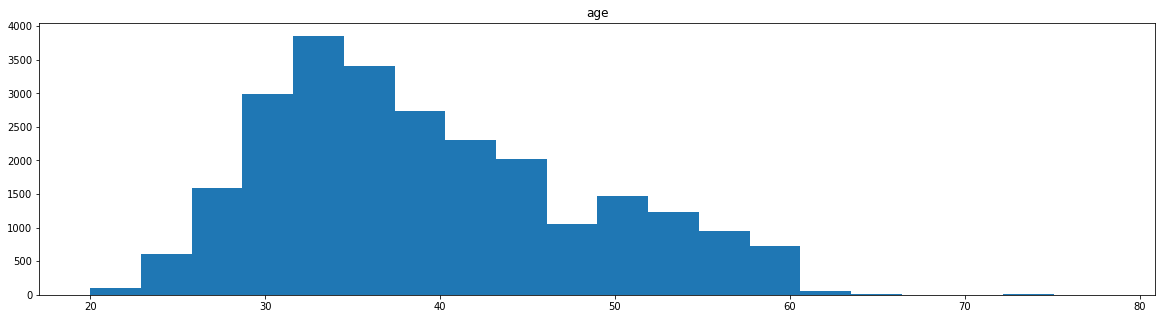

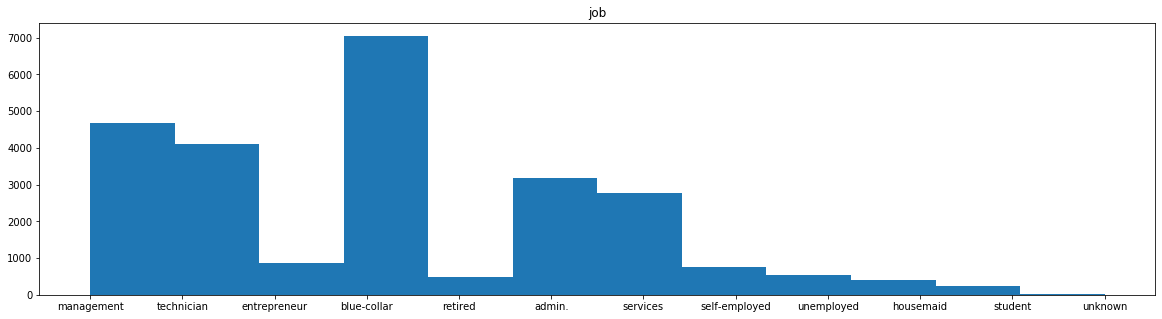

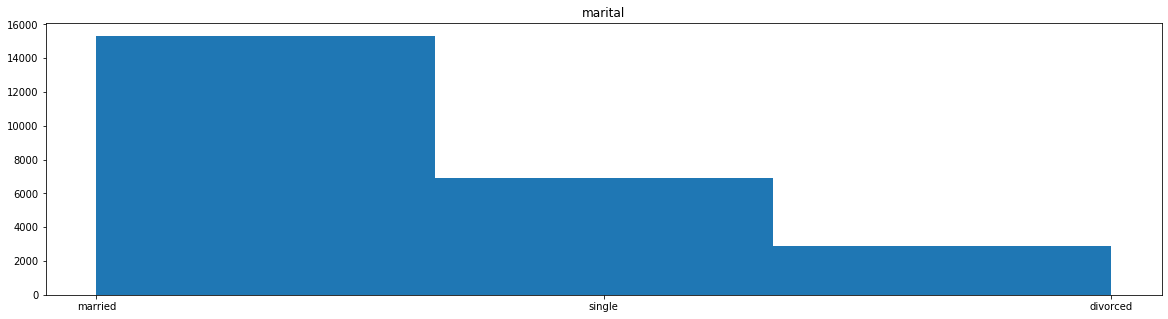

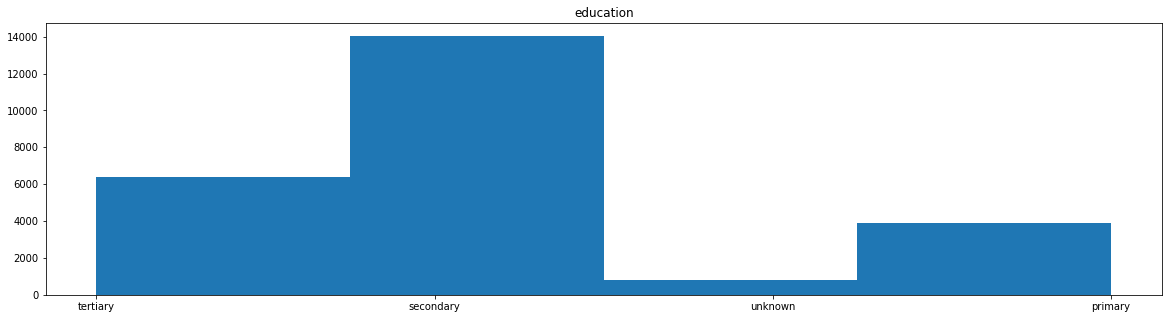

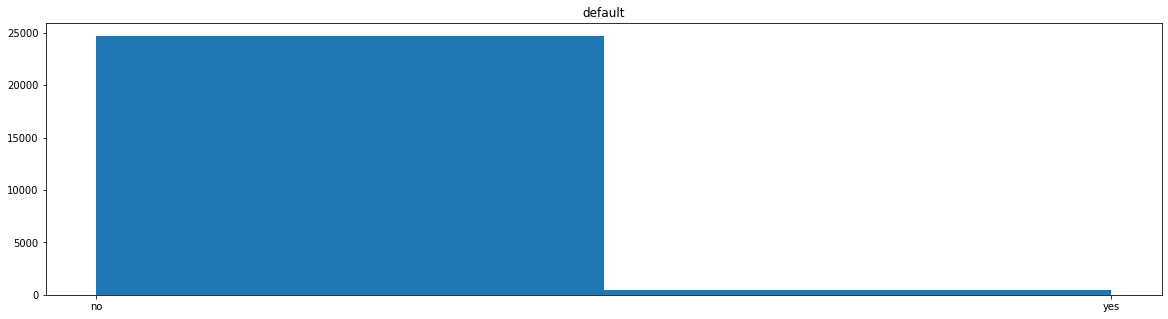

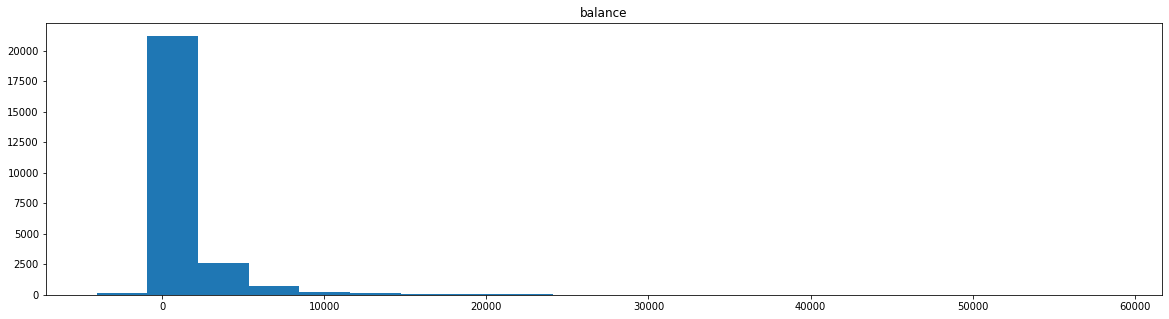

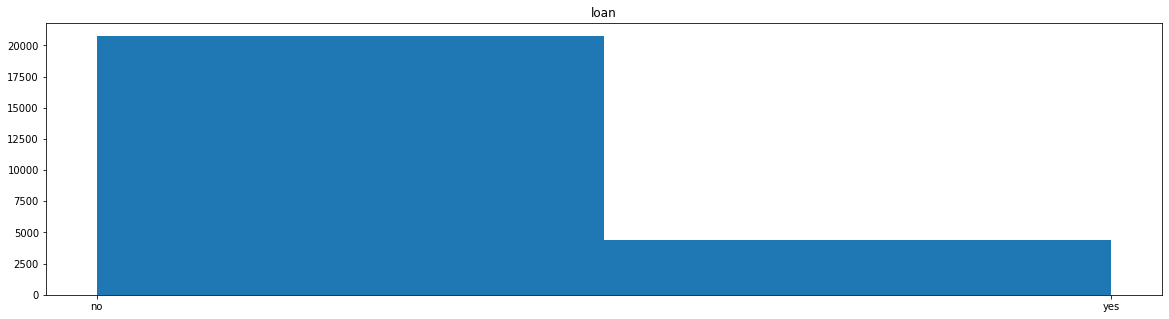

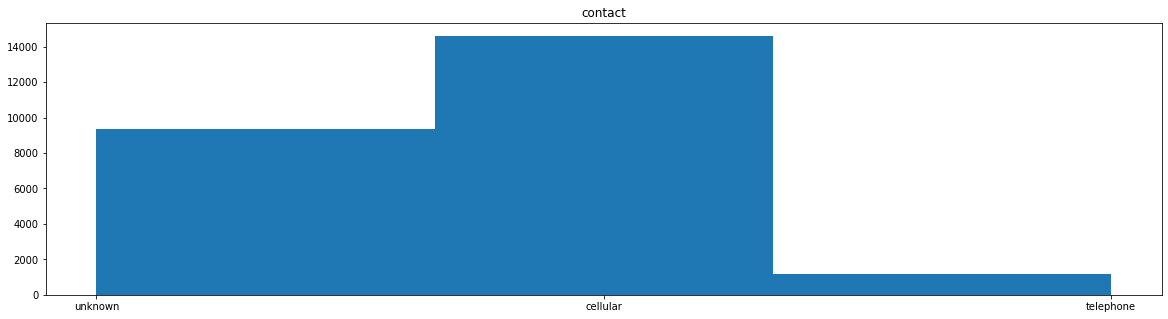

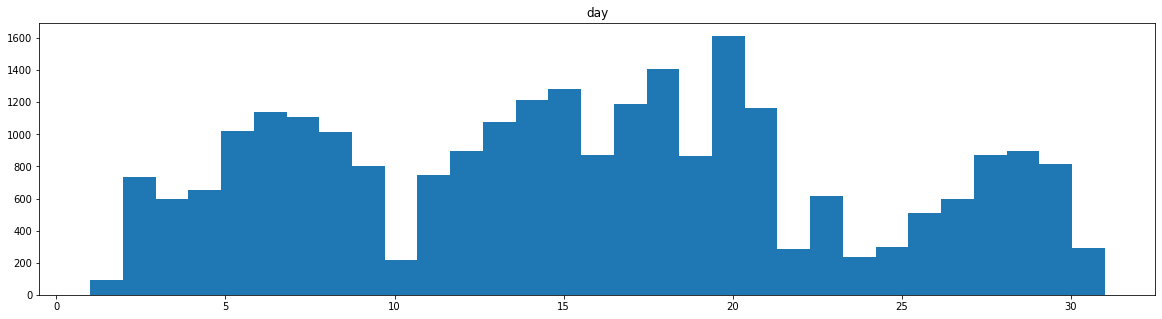

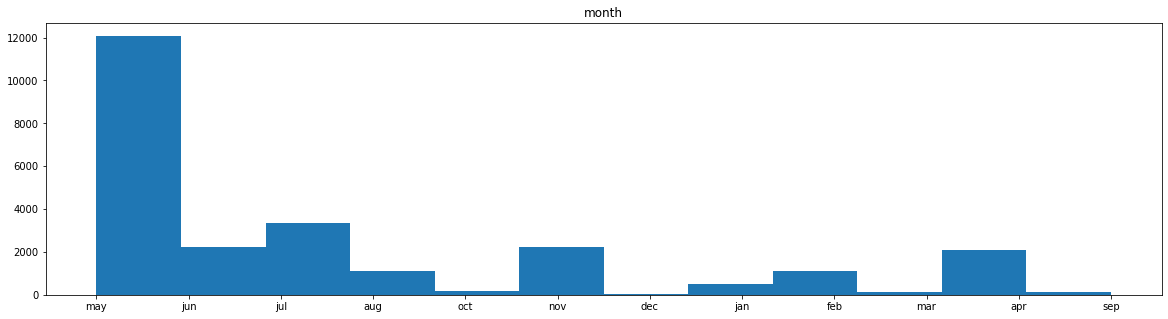

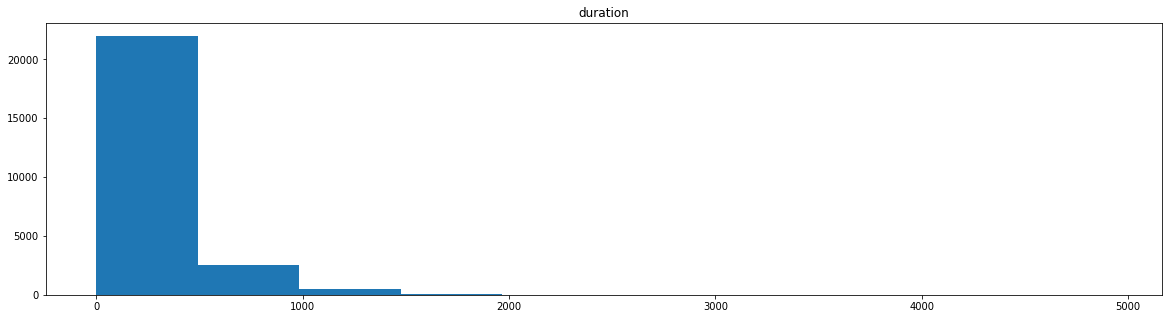

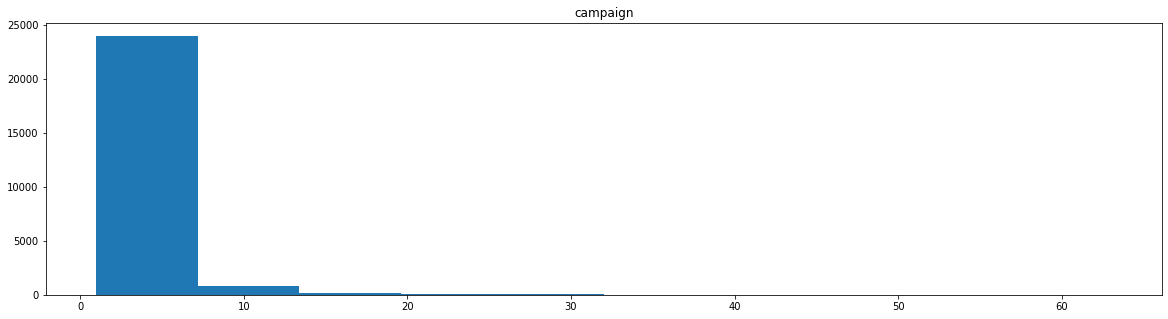

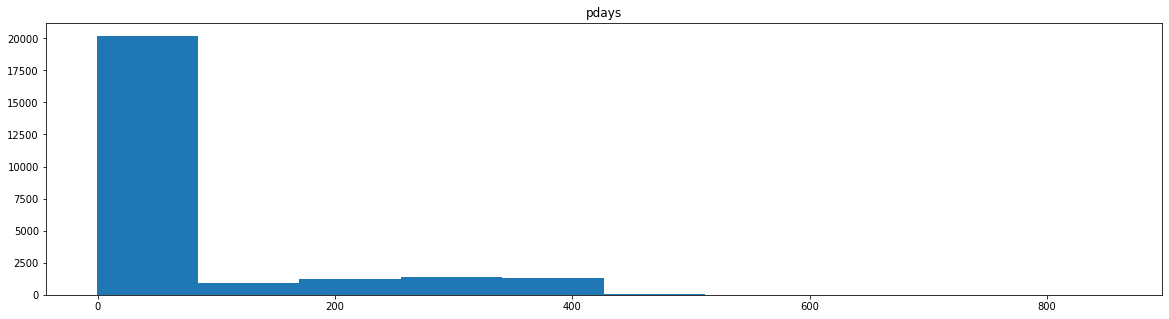

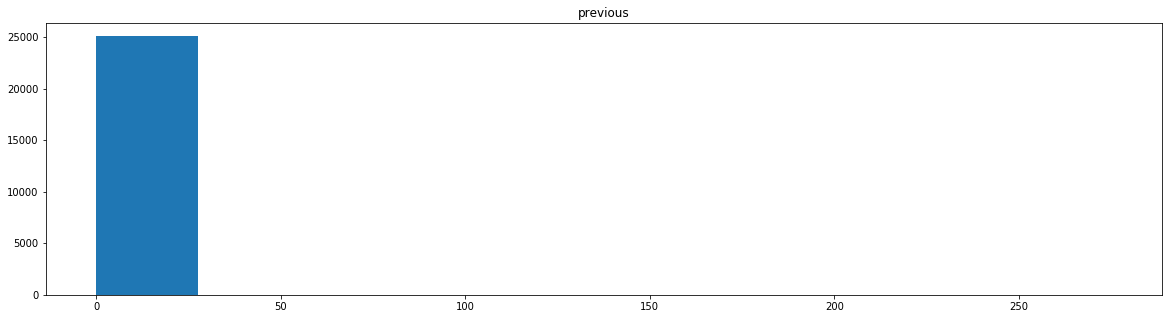

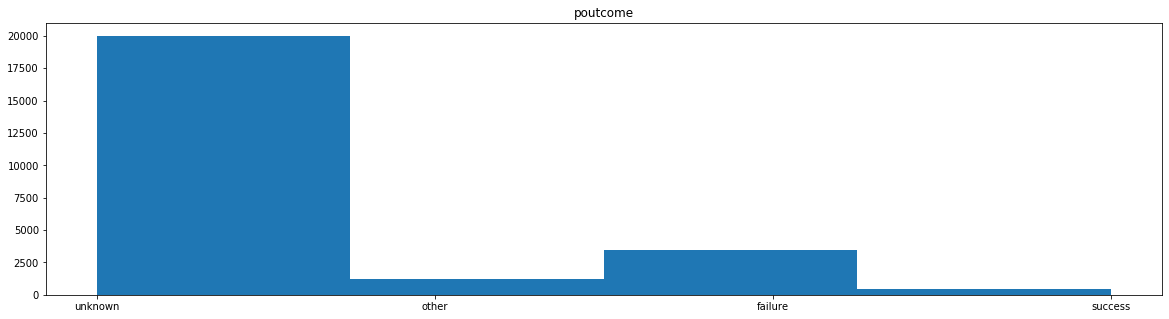

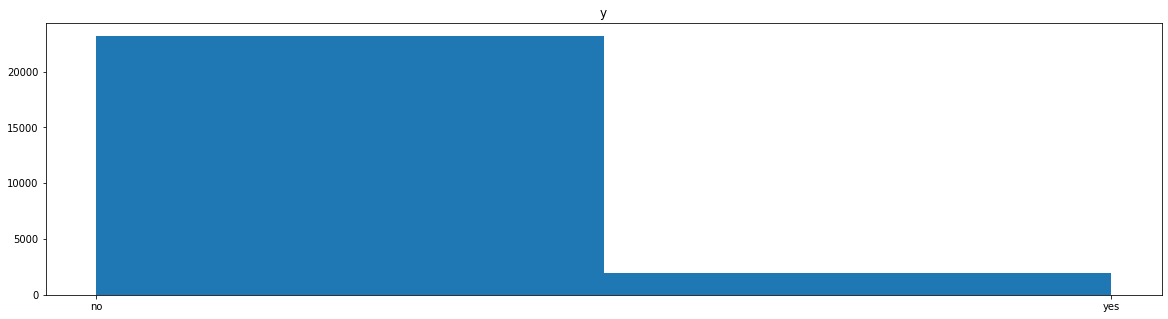

In [9]:
creditImob = []
for i in range(0, nLinhas):
    if listHousing[i] == 'yes':
        creditImob.append(DataFrame.iloc[i])
creditImob = np.array(creditImob)
print(creditImob.shape)

labels = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 
          'campaign', 'pdays', 'previous', 'poutcome', 'y']

listbins = [20, 12, 3, 4, 2, 20, 10, 2, 3, 31, 12, 10, 10, 10, 10, 4, 2]

for i in range(creditImob.shape[1]):
    if i == 6:
        pass
    else:
        ls = []
        for j in range(creditImob.shape[0]):
            ls.append(creditImob[j][i])
        plt.figure(figsize = (20, 5))
        plt.title(str(labels[i]), )
        plt.hist(ls, bins = listbins[i])

para cada uma das caraterísticas: <br>
age: concentrado entre 30 e 45 anos <br>
job: top 3: management, technician, blue-collar, admin, services <br>
marital: maioria está casado (mais do que solteiro e divorciado junto) <br>
education: maioria com educação "secondary"<br>
default: tem credito default em "no"<br>
balance: <br>
loan: não tem emprestimo pessoal <br>
contact: maioria contato por celular <br>
day: não represetativo <br>
month: maioria com ultimo contato no mês de maio (mesmo assim, não representativo) <br>
duration: maioria menos de 500 segundos no ultimo contato (não representativo)<br>
campaign: maioria com menos de 10 contatos (não representativo)<br>
pdays: maioria passou-se pouco tempo do ultimo contato (não representativo<br>
previous: não representativo <br>
poutcome: maioria "unknown" <br>
y: maioria não contratou na campanha atual<br>

> Com os dados fornecidos não pode ser estabeler causalidade, porém observa-se das gráficas:<br>
> As pessoas que possuem emprestimo imobiliario tem entre 30 e 45 anos, nas profissões mais estáveis (management, technician, blue-collar, admin), de preferencia casados e com pelo menos educação secundária completa.